**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
file_id = '1Hj-PUnOmNyy0pcjLrvf8mOM18LV3zPpW'
file_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(file_url)

Displaying Data

In [3]:
data

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50.0,White,Severe Side Effects
399996,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57.0,Other,Severe Side Effects
399998,TRUE,F,zoloft,59.0,White,No Side Effects


Duplicate Values

In [4]:
data.duplicated().value_counts()

False    398208
True       1792
dtype: int64

Percentage of duplicate values

In [5]:
data.duplicated().value_counts(normalize=True)

False    0.99552
True     0.00448
dtype: float64

In [6]:
# Use the drop_duplicates method to remove duplicate rows as it is less than 1%
data = data.drop_duplicates()

In [7]:
#NAME

In [8]:
#Drop the column "Name" which doesn't give any contribution for the modelling
data = data.drop(['NAME'], axis = 1)

In [9]:
data

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects
3,F,voltaren,44.0,White,Severe Side Effects
4,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...
399995,M,lamisil,50.0,White,Severe Side Effects
399996,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,M,celexa,57.0,Other,Severe Side Effects
399998,F,zoloft,59.0,White,No Side Effects


# DATA PREPROCESSING

# Filling Missing Values

In [10]:
data.isna().sum()

GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [11]:
print("Percentage of missing values in each column:")
print(100 * data.isnull().sum() / len(data))     #dividing the count of missing values by the total number of rows and then multiplying by 100.

Percentage of missing values in each column:
GENDER          0.000000
DRUG NAME       0.000000
AGE             0.005023
RACE            0.000000
SIDE EFFECTS    0.000000
dtype: float64


In [12]:
data['AGE'].median()# Filling it with median as the histogram shows skewed distribution.

41.0

In [13]:
data['AGE']  = data['AGE'].fillna(data['AGE'].median())

In [14]:
data.isna().sum()

GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

# Outliers

In [15]:
data.dtypes

GENDER           object
DRUG NAME        object
AGE             float64
RACE             object
SIDE EFFECTS     object
dtype: object

Text(0.5, 1.0, 'Boxplot for age')

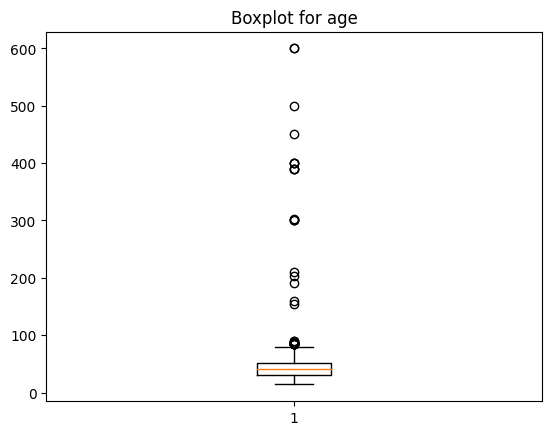

In [16]:
plt.boxplot(data['AGE'])
plt.title('Boxplot for age')

In [17]:
q1 = np.percentile(data['AGE'], 25)
q2 = np.percentile(data['AGE'], 50)
q3 = np.percentile(data['AGE'], 75)
iqr=q3-q1
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr
low_limit
upr_limit
outlier=[]
for x in data['AGE']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [18]:
outlier

[300.0,
 302.0,
 87.0,
 90.0,
 84.0,
 500.0,
 400.0,
 87.0,
 203.0,
 160.0,
 400.0,
 87.0,
 87.0,
 191.0,
 450.0,
 390.0,
 84.0,
 87.0,
 84.0,
 155.0,
 300.0,
 87.0,
 87.0,
 84.0,
 390.0,
 87.0,
 84.0,
 600.0,
 84.0,
 84.0,
 87.0,
 84.0,
 211.0,
 600.0,
 401.0,
 89.0,
 300.0,
 390.0]

In [19]:
ind1 = data['AGE']>upr_limit
data.loc[ind1].index

Int64Index([  3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
            111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
            186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
            264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
            325631, 333669, 337790, 363934, 384352, 393820],
           dtype='int64')

In [20]:
# No lower outliers

In [21]:
# Drop rows with 'AGE' values above 100
data = data[data['AGE'] <= 100]

# Now, 'data' will contain only rows where 'AGE' is 100 or below


In [22]:
pd.set_option('display.max_rows', None)

In [23]:
data['AGE'].value_counts()

55.0    15493
37.0    14307
29.0    13671
24.0    13640
41.0    12945
50.0    12599
35.0    12514
36.0    12488
51.0    12453
43.0    11496
38.0    11408
44.0    11237
54.0    11165
26.0    10481
28.0    10399
40.0    10079
52.0    10058
47.0     9304
56.0     9300
48.0     9289
33.0     8939
23.0     8486
45.0     8192
25.0     8165
53.0     7972
27.0     7567
31.0     7322
39.0     7130
22.0     7101
49.0     7100
32.0     6985
34.0     6872
46.0     6736
42.0     6648
60.0     6276
30.0     5977
62.0     5224
58.0     5020
65.0     4989
57.0     4175
64.0     4032
61.0     3308
63.0     2696
20.0     2683
18.0     2459
21.0     2282
59.0     2128
70.0     1945
66.0     1128
69.0     1056
71.0     1017
17.0      986
15.0      516
19.0      272
67.0      218
72.0       96
75.0       48
68.0       48
73.0       32
87.0        9
74.0        8
14.0        8
84.0        8
90.0        1
80.0        1
77.0        1
89.0        1
Name: AGE, dtype: int64

In [24]:
data.shape

(398189, 5)

# Encoding

In [25]:
# As the dataset is large, I am considering Label encoding

In [26]:
label_columns = ['GENDER','RACE','DRUG NAME','SIDE EFFECTS']

Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in label_columns:
    data[column] = le.fit_transform(data[column])

<ipython-input-27-a4480c16519a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-27-a4480c16519a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-27-a4480c16519a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

# Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

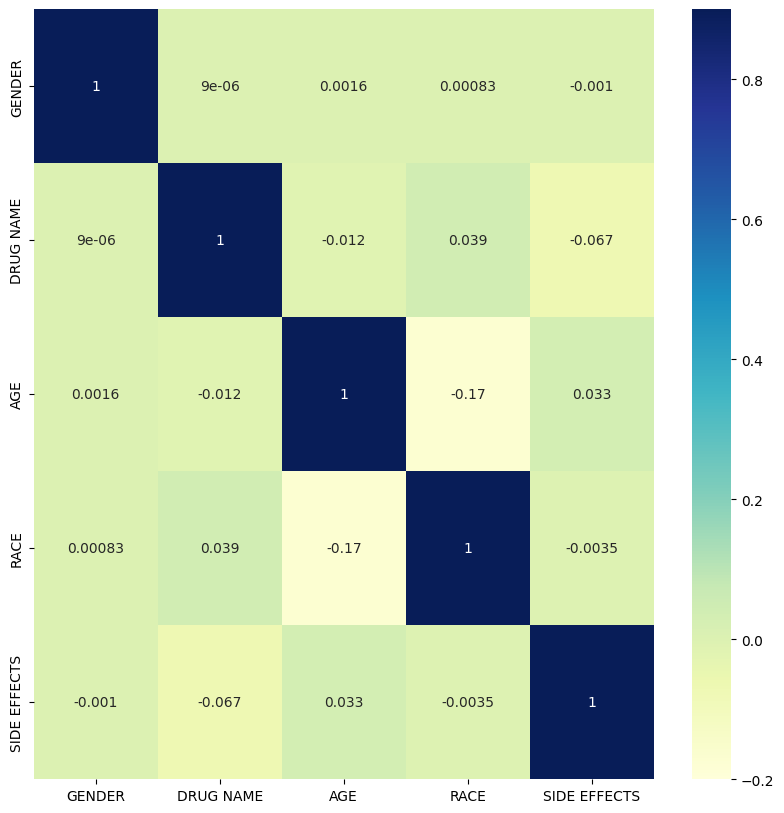

In [28]:
plt.figure(figsize=(10,10))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show

In [29]:
# No correlation between any features. So I am not dropping anything.

# Scaling

In [30]:
# I am not doing scaling because scaling has to be done on continuous numerical columns. But in my dataset all are discrete.

# Train Test Splitting

In [31]:
X=data.drop('SIDE EFFECTS',axis=1)
y=data['SIDE EFFECTS']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (298641, 4)
y_train dataset:  (298641,)
X_test dataset:  (99548, 4)
y_test dataset:  (99548,)


# Model Selection Based on Metrics

In [34]:
# I am Considering models which are not effected by the magnitude difference in each features.

In [35]:
# DECISION TREE

In [36]:
data['SIDE EFFECTS'].value_counts()# multiclass classification

1    132665
3    115245
2     74162
4     53187
0     22930
Name: SIDE EFFECTS, dtype: int64

In [37]:
data['SIDE EFFECTS'].value_counts(normalize=True)

1    0.333171
3    0.289423
2    0.186248
4    0.133572
0    0.057586
Name: SIDE EFFECTS, dtype: float64

In [38]:
# It is an imbalanced dataset, so I am considering other metrics rather than accuracy

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred=dt_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.9863985213163499
Precision =  0.9864405884238486
Recall =  0.9863985213163499
F1 Score =  0.9863622857744598


In [42]:
# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=rf_clf.predict(X_test)

In [45]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.9858862056495359
Precision =  0.985906308498605
Recall =  0.9858862056495359
F1 Score =  0.9858656730662261


In [46]:
# GBM

In [47]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gbm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm_clf.predict(X_test)

In [48]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.80629445091815
Precision =  0.8162833796216451
Recall =  0.80629445091815
F1 Score =  0.8052327338130272


In [49]:
# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the Naive Bayes classifier to the training data
nb_clf.fit(X_train, y_train)

# Predict using the Naive Bayes classifier
y_pred = nb_clf.predict(X_test)

In [51]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.34171454976493754
Precision =  0.26595736489947286
Recall =  0.34171454976493754
F1 Score =  0.2821504728244714


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Decision Tree is considerind as the best model because all the metrics(not considering accuracy as the dataset is an imbalanced one) are more in it.

**CROSS VALIDATION**

In [53]:
from sklearn.model_selection import StratifiedKFold
# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store precision, recall, and F1 scores for each fold
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Fit the classifier on the training data
    dt_classifier.fit(X_train_cv, y_train_cv)

    # Predict on the test data
    y_pred_cv = dt_classifier.predict(X_test_cv)

    # Calculate precision, recall, and F1 scores
    precision = precision_score(y_test_cv, y_pred_cv,average='weighted')
    recall = recall_score(y_test_cv, y_pred_cv,average='weighted')
    f1 = f1_score(y_test_cv, y_pred_cv,average='weighted')

    precision_scores_dt.append(precision)
    recall_scores_dt.append(recall)
    f1_scores_dt.append(f1)

# Calculate and print the mean precision, recall, and F1 scores across all folds
mean_precision = sum(precision_scores_dt) / len(precision_scores_dt)
mean_recall = sum(recall_scores_dt) / len(recall_scores_dt)
mean_f1 = sum(f1_scores_dt) / len(f1_scores_dt)

print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)

Mean Precision: 0.9863593616546146
Mean Recall: 0.986323077582729
Mean F1 Score: 0.9863195530972095


HYPERPARAMETER TUNING

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'random_state': [None, 42],
}

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
cv_model_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_params,
                                 scoring='f1_weighted', n_jobs=-1, return_train_score=True,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Fit the randomized search to your training data
cv_model_dt.fit(X_train_cv, y_train_cv)

# Get the best hyperparameters for Decision Tree
best_params_dt = cv_model_dt.best_params_

# Print the best parameters
print("Best Parameters for Decision Tree (F1 Weighted Score):", best_params_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Best Parameters for Decision Tree (F1 Weighted Score): {'splitter': 'best', 'random_state': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy'}


In [55]:
# Use the best hyperparameters obtained from RandomizedSearchCV
best_params_dt = {
    'splitter': 'random',
    'random_state': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': None,
    'max_depth': 50,
    'criterion': 'entropy'
}

# Create a new Decision Tree classifier with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params_dt)

# Fit the model to your training data
best_dt_model.fit(X_train_cv, y_train_cv)

# Predict on the test data
y_pred_dt = best_dt_model.predict(X_test_cv)

# Calculate precision, recall, and F1-score
precision_dt = precision_score(y_test_cv, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_cv, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_cv, y_pred_dt, average='weighted')

# Print the evaluation metrics
print("Precision (Decision Tree):", precision_dt)
print("Recall (Decision Tree):", recall_dt)
print("F1 Score (Decision Tree):", f1_dt)


Precision (Decision Tree): 0.9854430685612867
Recall (Decision Tree): 0.9854087923954945
F1 Score (Decision Tree): 0.9854125341554615
